In [53]:
import numpy as np
import pandas as pd
from sklearn import linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/eggplantbren/STATS331/master/Code/Regression/road.txt', sep='\t', header=None)
dataset = df.values
n  = dataset.shape[1]

x = dataset[:, 0:n-1]
y = dataset[: , n-1:n]

In [32]:
## data preprocessing

# feature scaling and mean normalization
x = preprocessing.scale(x)

# split the dataset into train and test data
x_train, x_test , y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.3, random_state=42)

m, n = x_train.shape[0], n

# forming matrices 
ones = np.ones((m,1))
A_train = np.hstack([ones, x_train])
b_train = y_train

In [39]:
# cost function 
def cost_function(theta, A, b, m):
    return sum((np.dot(A,theta) - b)**2)[0]/(2*m)

In [41]:
# gradient descent algorithm
def gradient_descent(theta, A, b, m,n, e=1e-5, alpha=0.01):
    no_of_steps = 0
    while True:
        cost_prev = cost_function(theta, A, b, m)
        theta -= (alpha/m) * (np.dot((np.dot(A,theta) - b).T, A).T)
        cost_curr = cost_function(theta, A,b,m)
        
        if abs(cost_prev - cost_curr) < e:
            break
        no_of_steps += 1
    return (theta, no_of_steps)

In [42]:
# initialize the parameters ;theta
theta = np.zeros((n,1))

# define error tolerance ; e
e = 1e-10

# define learning rate ; alpha
alpha = 0.01

gradient_descent(theta, A_train, b_train , m,n, e, alpha)



(array([[429.10844071],
        [-64.76488377]]), 1676)

In [43]:
# using skearn linear_model
lgr = linear_model.LinearRegression()
lgr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lgr.intercept_

array([429.10852933])

In [45]:
lgr.coef_

array([[-64.76481349]])

In [51]:
m, n = x_test.shape[0], n
ones = np.ones((m,1))
A_test = np.hstack([ones, x_test])
b_test = y_test

y_test_pred_grad  = np.dot(A_test, theta)

y_test_sklearn = lgr.predict(x_test)

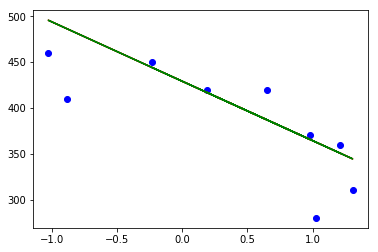

In [56]:
# visualizing the results
fig , aux = plt.subplots()
aux.plot(x_test, y_test, 'bo', x_test, y_test_sklearn, 'r-', x_test, y_test_pred_grad, 'g-')
plt.show()